In [25]:
import math
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def g(t):
    return math.sin(math.pi*t/2)

In [27]:
#The function gl(t,n) is used to recover distances between points after they have been compressed
def gl(t,nlevels):
    for i in range(nlevels):
        t = g(t)
    return t

Experiment from Figure 2:

In [28]:
#We do N independent trials, with k=1 and k=4 nearest neighbors where the dimension of the data D is d=3
N=500
k=4
d=3

In [29]:
'''
The lists L1,L2,JL will store the proportion of 1-nearest neighbors recovered where L1 is the 1-layer map, 
L2 is the 2-layer map and JL is Gaussian random projecction.
L14,L24,JL4 are the same except for the 4-nearest neighbors
'''
L1 = []
L2 = []
JL = []
L14 = [] 
L24 = [] 
JL4 = [] 
# As i ranges from 0 to 11, the embedding dimension ranges from 2^3 to 2^13
# The 2-layer map first maps to a space of dimension 8 times the embedding dimension
for i in range(11): 
    Dlist1=[d,2**(i+3)] 
    Dlist2=[d,8*(2**(i+3)),(2**(i+3))] 
    l1 = 0 
    l2 = 0 
    jl = 0 
    l14 = 0 
    l24 = 0 
    jl4 = 0 
    for j in range(N):
        # Create the dataset D described in "Randomly generated data" paragraph
        L = [] 
        x0 = np.random.normal(loc = 0.0,scale=1.0,size=d) 
        x0 = x0/np.linalg.norm(x0) 
        L.append(x0) 
        for i in range(100): 
            dist = .01*(i+1) 
            y = x0 + dist*(1/np.sqrt(d))*np.random.normal(loc = 0.0,scale=1.0,size=d) 
            y = y/np.linalg.norm(y) 
            L.append(y) 
        D = np.array(L) 
        #Now we compress D with the 2-layer map, the 1-layer map and Gaussian random projection
        # G1,G2,H2 are the necessary Gaussian random vectors, and D1,D2,DJ are the compressed points with 1-layer, 2-layer and Gaussian projection
        G1 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist1[0],Dlist1[1]]) 
        G2 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist2[0],Dlist2[1]]) 
        H2 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist2[1],Dlist2[2]]) 
        D1 = np.sign(np.matmul(D,G1))/np.sqrt(Dlist1[1]) 
        D2 = np.sign(np.matmul(np.sign(np.matmul(D,G2)),H2))/np.sqrt(Dlist2[2]) 
        DJ = np.matmul(D,G1)/np.sqrt(Dlist1[1]) 
        #The following counts the number of true nearest neighbors recovered by each compressed dataset
        dist = np.argsort([np.linalg.norm(D[0]-D[i]) for i in range(1,100)])[:4] 
        distJ = np.argsort([np.linalg.norm(DJ[0]-DJ[i]) for i in range(1,100)])[:4] 
        dist1 = np.argsort([np.sqrt(2-2*gl(np.dot(D1[0],D1[i]),1)) for i in range(1,100)])[:4] 
        dist2 = np.argsort([np.sqrt(2-2*gl(np.dot(D2[0],D2[i]),2)) for i in range(1,100)])[:4] 
        l14 = l14 + len(np.intersect1d(dist,dist1)) 
        l24 = l24 + len(np.intersect1d(dist,dist2)) 
        jl4 = jl4 + len(np.intersect1d(dist,distJ)) 
        l1 = l1 + len(np.intersect1d(dist[:1],dist1[:1])) 
        l2 = l2 + len(np.intersect1d(dist[:1],dist2[:1])) 
        jl = jl + len(np.intersect1d(dist[:1],distJ[:1])) 
    L1.append(l1/(N)) 
    L2.append(l2/(N)) 
    JL.append(jl/(N)) 
    L14.append(l14/(N)) 
    L24.append(l24/(N)) 
    JL4.append(jl4/(N)) 
    print(l1/(N)) 
    print(l2/(N)) 
    print(jl/(N)) 
    print(l14/(N)) 
    print(l24/(N)) 
    print(jl4/(N))

0.632
0.614
0.886
1.008
1.114
3.59
0.6
0.552
0.924
1.106
1.546
3.74
0.542
0.48
0.922
1.352
2.244
3.822
0.586
0.54
0.964
1.964
2.49
3.874
0.568
0.574
0.968
2.504
2.816
3.908
0.582
0.626
0.99
2.95
3.122
3.922
0.626
0.732
0.986
3.174
3.31
3.94
0.746
0.822
0.986
3.392
3.544
3.958
0.788
0.866
0.994
3.582
3.642
3.98
0.85
0.908
1.0
3.668
3.744
3.97
0.892
0.928
1.0
3.812
3.834
3.994


In [30]:
A = [i for i in range(3,14)]
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

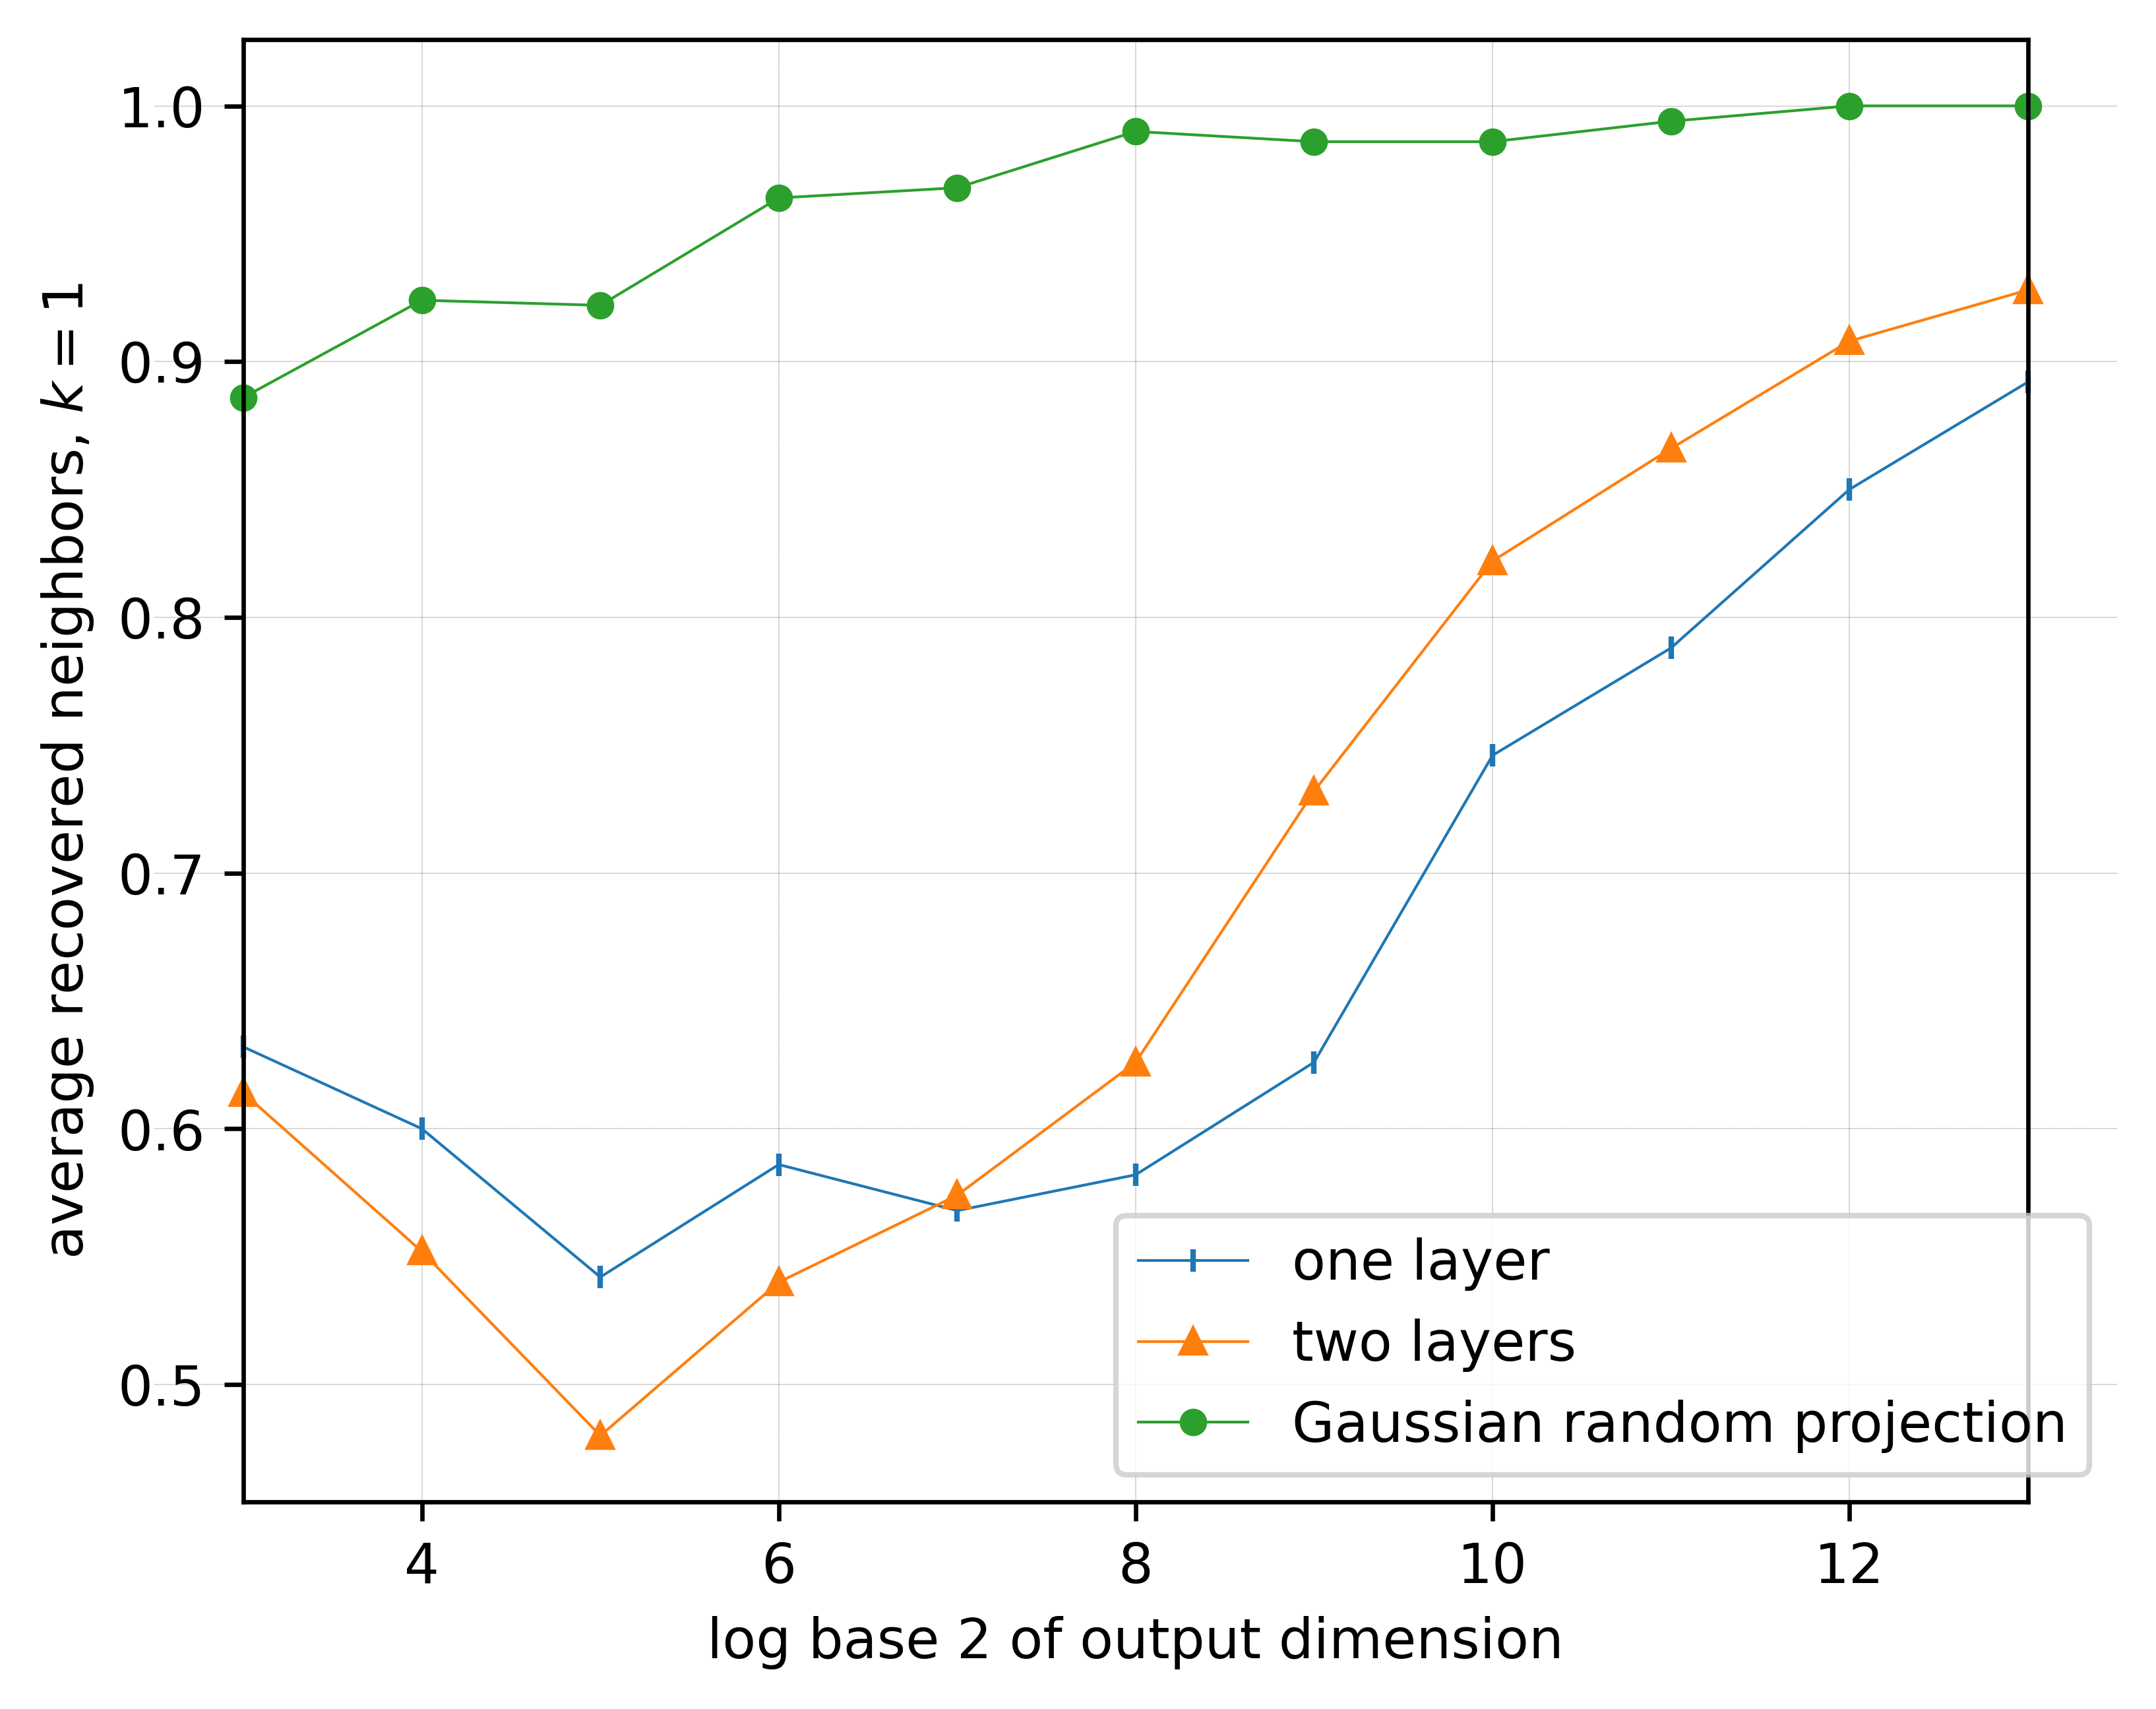

In [31]:
#Plot for number of neighbors k=1
fig, ax = plt.subplots()
plt.plot(A, [L1[j] for j in range(11)],linewidth = .5,marker = '|',markersize=4)
plt.plot(A, [L2[j] for j in range(11)],linewidth = .5,marker = '^',markersize=4)
plt.plot(A, [JL[j] for j in range(11)],linewidth = .5,marker = 'o',markersize=4)
plt.xlabel("log base 2 of output dimension")
plt.ylabel("average recovered neighbors, $k=1$")
ax.grid(color = 'black', linestyle = '--', linewidth = 0.05)
ax.spines['left'].set_position(('data', 3))
ax.spines['right'].set_position(('data', 13))
ax.spines['bottom'].set_bounds(3,13)
ax.spines['top'].set_bounds(3,13)
plt.legend(["one layer", "two layers", "Gaussian random projection"], loc="best")
plt.savefig('k=1')

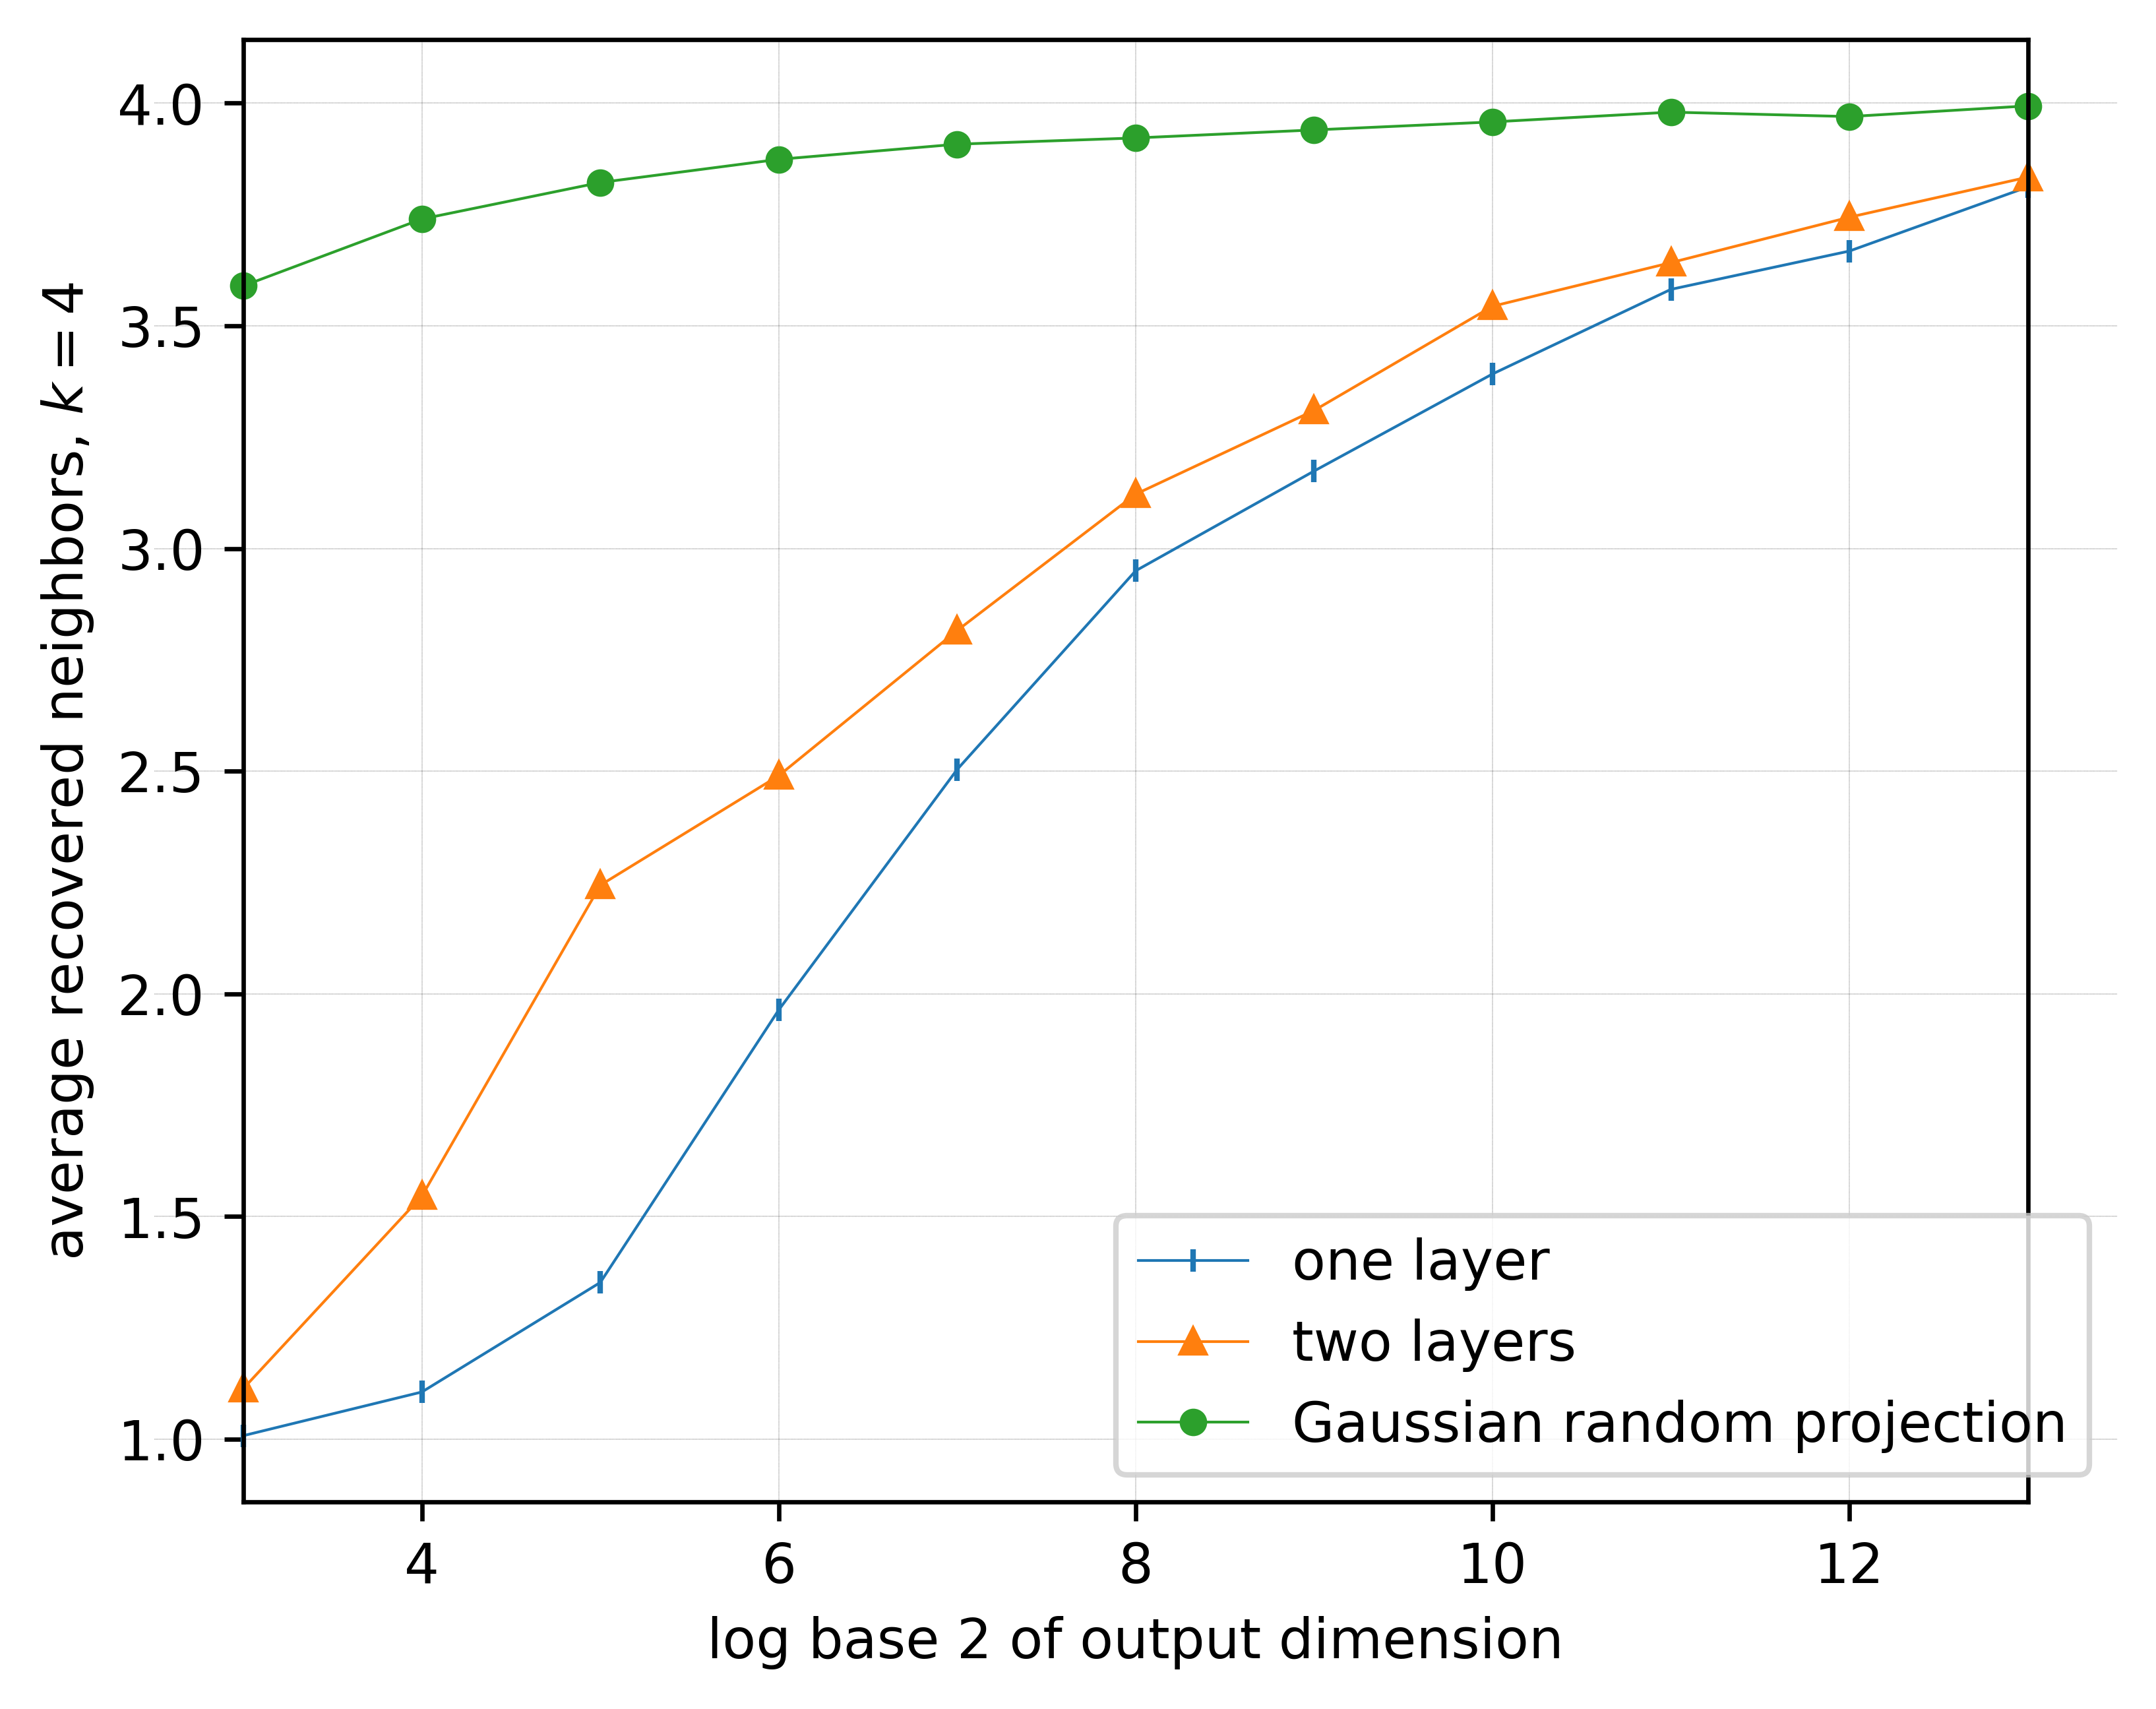

In [32]:
#Plot for number of neighbors k=4
fig, ax = plt.subplots()
plt.plot(A, [L14[j] for j in range(11)],linewidth = .5,marker = '|',markersize=4)
plt.plot(A, [L24[j] for j in range(11)],linewidth = .5,marker = '^',markersize=4)
plt.plot(A, [JL4[j] for j in range(11)],linewidth = .5,marker = 'o',markersize=4)
plt.xlabel("log base 2 of output dimension")
plt.ylabel("average recovered neighbors, $k=4$")
ax.grid(color = 'black', linestyle = '--', linewidth = 0.05)
ax.spines['left'].set_position(('data', 3))
ax.spines['right'].set_position(('data', 13))
ax.spines['bottom'].set_bounds(3,13)
ax.spines['top'].set_bounds(3,13)
plt.legend(["one layer", "two layers", "Gaussian random projection"], loc="best")
plt.savefig('k=4')

Experiment from Figure 3:

In [16]:
#import the RCV1 dataset (the points are already normalized to have unit norm)
from sklearn.datasets import fetch_rcv1
rcv = fetch_rcv1()

In [17]:
# We only consider the first 23149 points in the dataset (the training set)
D = rcv.data[0:23149,:].toarray()

In [18]:
#S is the number of points 
S = 23149

In [19]:
#Find the 179 points in D such that there exists at least one neighbor at distance < .05
#Warning: takes 10+ hours on standard laptop
Q=[]
for i in range(S):
    dist = [np.linalg.norm(D[i]-D[j]) for j in [*range(S)][:i] + [*range(S)][i+1:]]
    if(dist[np.argsort(dist)[0]]>0 and dist[np.argsort(dist)[0]]<.05):
        Q.append(i)

KeyboardInterrupt: 

In [20]:
#The above code gives
Q=[85,130,193,352,491,1089,1090,1289,1362,1504,1632,1794,2304,2482,2726,3024,3672,3714,3930,4087,4089,4267,4596,5304,5307,5331,5432,
   5433,5445,5539,5561,5600,6040,6109,6112,6245,6541,6562,6563,6605,6850,7067,7429,7430,7433,7661,7685,7751,7814,7815,7953,7966,7970,
   8262,8696,8849,9339,9346,9369,9406,9542,9787,10141,10194,10448,10469,10569,10682,10744,10765,10827,10838,10949,11527,11576,11646,
   12257,12364,12378,12597,12717,12737,12780,12791,13011,13142,13899,14038,14317,14327,14354,14355,14679,14764,15182,15186,15216,15302,
   15383,15563,15568,15580,15637,16093,16130,16376,16563,16586,16669,16726,16837,16844,16908,16909,17350,17351,17352,17589,17877,17888,
   17889,17913,17919,17921,17937,17998,18014,18039,18048,18128,18176,18412,18560,19095,19504,19562,19773,19788,19851,19862,20202,20347,
   20394,20418,20477,20523,20616,20840,20873,20900,20903,20911,21043,21283,21422,21580,21644,21766,21785,21792,21818,21824,21846,21875,
   22099,22300,22322,22520,22747,22759,22823,22844,22869,22876,22970,23090,23142,23143,23144]

In [21]:
len(Q)

179

In [22]:
D.shape

(23149, 47236)

In [23]:
#We do N=10 independent trials
N=10
# d is the dimension of D
# And we do an experiment involving the nearest neighbor as well as the k=4 nearest neighbors
d = 47236
k=4

In [36]:
'''
The lists L1,L2,JL will store the proportion of 1-nearest neighbors recovered where L1 is the 1-layer map, 
L2 is the 2-layer map and JL is Gaussian random projecction.
L14,L24,JL4 are the same except for the 4-nearest neighbors
'''
L1 = [] 
L2 = [] 
JL = [] 
L14 = [] 
L24 = [] 
JL4 = [] 
# As i ranges from 0 to 9, the embedding dimension ranges from 2^3 to 2^11
# The 2-layer map first maps to a space of dimension 6 times the embedding dimension
for i in range(9): 
    Dlist1=[d,2**(i+3)] 
    Dlist2=[d,6*(2**(i+3)),(2**(i+3))] 
    l1 = 0 
    l2 = 0 
    jl = 0 
    l14 = 0 
    l24 = 0 
    jl4 = 0 
    for j in range(N): 
        # G1,G2,H2 are the necessary Gaussian random vectors, and D1,D2,DJ are the compressed points with 1-layer, 2-layer and Gaussian projection
        G1 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist1[0],Dlist1[1]]) 
        G2 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist2[0],Dlist2[1]]) 
        H2 = np.random.normal(loc=0.0,scale=1.0, size=[Dlist2[1],Dlist2[2]]) 
        D1 = np.sign(np.matmul(D,G1))/np.sqrt(Dlist1[1]) 
        D2 = np.sign(np.matmul(np.sign(np.matmul(D,G2)),H2))/np.sqrt(Dlist2[2]) 
        DJ = np.matmul(D,G1)/np.sqrt(Dlist1[1]) 
        for m in range(len(Q)): 
            #For each point in Q, add the number of neighbors recovered 
            X0 = Q[m] 
            dist = np.argsort([np.linalg.norm(D[X0]-D[i]) for i in range(S)])[1:5] 
            distJ = np.argsort([np.linalg.norm(DJ[X0]-DJ[i]) for i in range(S)])[1:5] 
            dist1 = np.argsort([np.sqrt(2-2*gl(np.dot(D1[X0],D1[i]),1)) for i in range(S)])[1:5] 
            dist2 = np.argsort([np.sqrt(2-2*gl(np.dot(D2[X0],D2[i]),2)) for i in range(S)])[1:5] 
            l14 = l14 + len(np.intersect1d(dist,dist1)) 
            l24 = l24 + len(np.intersect1d(dist,dist2)) 
            jl4 = jl4 + len(np.intersect1d(dist,distJ)) 
            l1 = l1 + len(np.intersect1d(dist[:1],dist1[:1])) 
            l2 = l2 + len(np.intersect1d(dist[:1],dist2[:1])) 
            jl = jl + len(np.intersect1d(dist[:1],distJ[:1])) 
    L1.append(l1/(N*len(Q))) 
    L2.append(l2/(N*len(Q))) 
    JL.append(jl/(N*len(Q))) 
    L14.append(l14/(N*len(Q))) 
    L24.append(l24/(N*len(Q))) 
    JL4.append(jl4/(N*len(Q))) 
    print(l1/(N*len(Q)))
    print(l2/(N*len(Q))) 
    print(jl/(N*len(Q))) 
    print(l14/(N*len(Q))) 
    print(l24/(N*len(Q))) 
    print(jl4/(N*len(Q)))

0.011731843575418994
0.010614525139664804
0.9564245810055866
0.06871508379888268
0.056424581005586595
1.5837988826815643
0.3474860335195531
0.23631284916201117
0.9541899441340782
0.8681564245810056
0.5871508379888268
1.7893854748603353
0.5402234636871508
0.6944134078212291
0.9558659217877095
1.2374301675977655
1.2301675977653632
2.1318435754189946
0.6564245810055865
0.852513966480447
0.9592178770949721
1.6363128491620111
1.5458100558659218
2.5162011173184355
0.7681564245810056
0.9094972067039107
0.9569832402234637
2.1335195530726256
1.8424581005586593
2.847486033519553


KeyboardInterrupt: 

In [1]:
A = [i for i in range(3,12)]

In [2]:
#Plot the proportion of nearest neighbors recovered k=1:
fig, ax = plt.subplots()
plt.plot(A, [L1[j] for j in range(9)],linewidth = .5,marker = '|',markersize=4)
plt.plot(A, [L2[j] for j in range(9)],linewidth = .5,marker = '^',markersize=4)
plt.plot(A, [JL[j] for j in range(9)],linewidth = .5,marker = 'o',markersize=4)
plt.xlabel("log base 2 of output dimension")
plt.ylabel("average recovered neighbors, $k=1$")
ax.grid(color = 'black', linestyle = '--', linewidth = 0.05)
ax.spines['left'].set_position(('data', 3))
ax.spines['right'].set_position(('data', 11))
ax.spines['bottom'].set_bounds(3,11)
ax.spines['top'].set_bounds(3,11)
plt.legend(["one layer", "two layers", "Gaussian random projection"], loc="best")
plt.savefig('k=1rcv')

NameError: name 'plt' is not defined